In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [3]:
train_path = r"C:\Users\RENUKA\Downloads\archive (2)\archive (3)\DATASET\TRAIN"
test_path = r"C:\Users\RENUKA\Downloads\archive (2)\archive (3)\DATASET\TEST"

In [4]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image' : x_data, 'label' : y_data})

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:47<00:00, 211.98it/s]


In [5]:
from collections import Counter
Counter(y_data)

Counter({'C:\\Users\\RENUKA\\Downloads\\archive (2)\\archive (3)\\DATASET\\TRAIN\\O': 12565,
         'C:\\Users\\RENUKA\\Downloads\\archive (2)\\archive (3)\\DATASET\\TRAIN\\R': 9999})

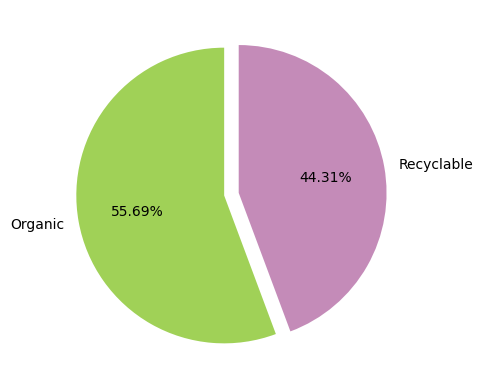

In [6]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), startangle = 90, explode = [0.05, 0.05], autopct = '%0.2f%%',
       labels = ['Organic', 'Recyclable'], colors = colors, radius = 1)
plt.show()

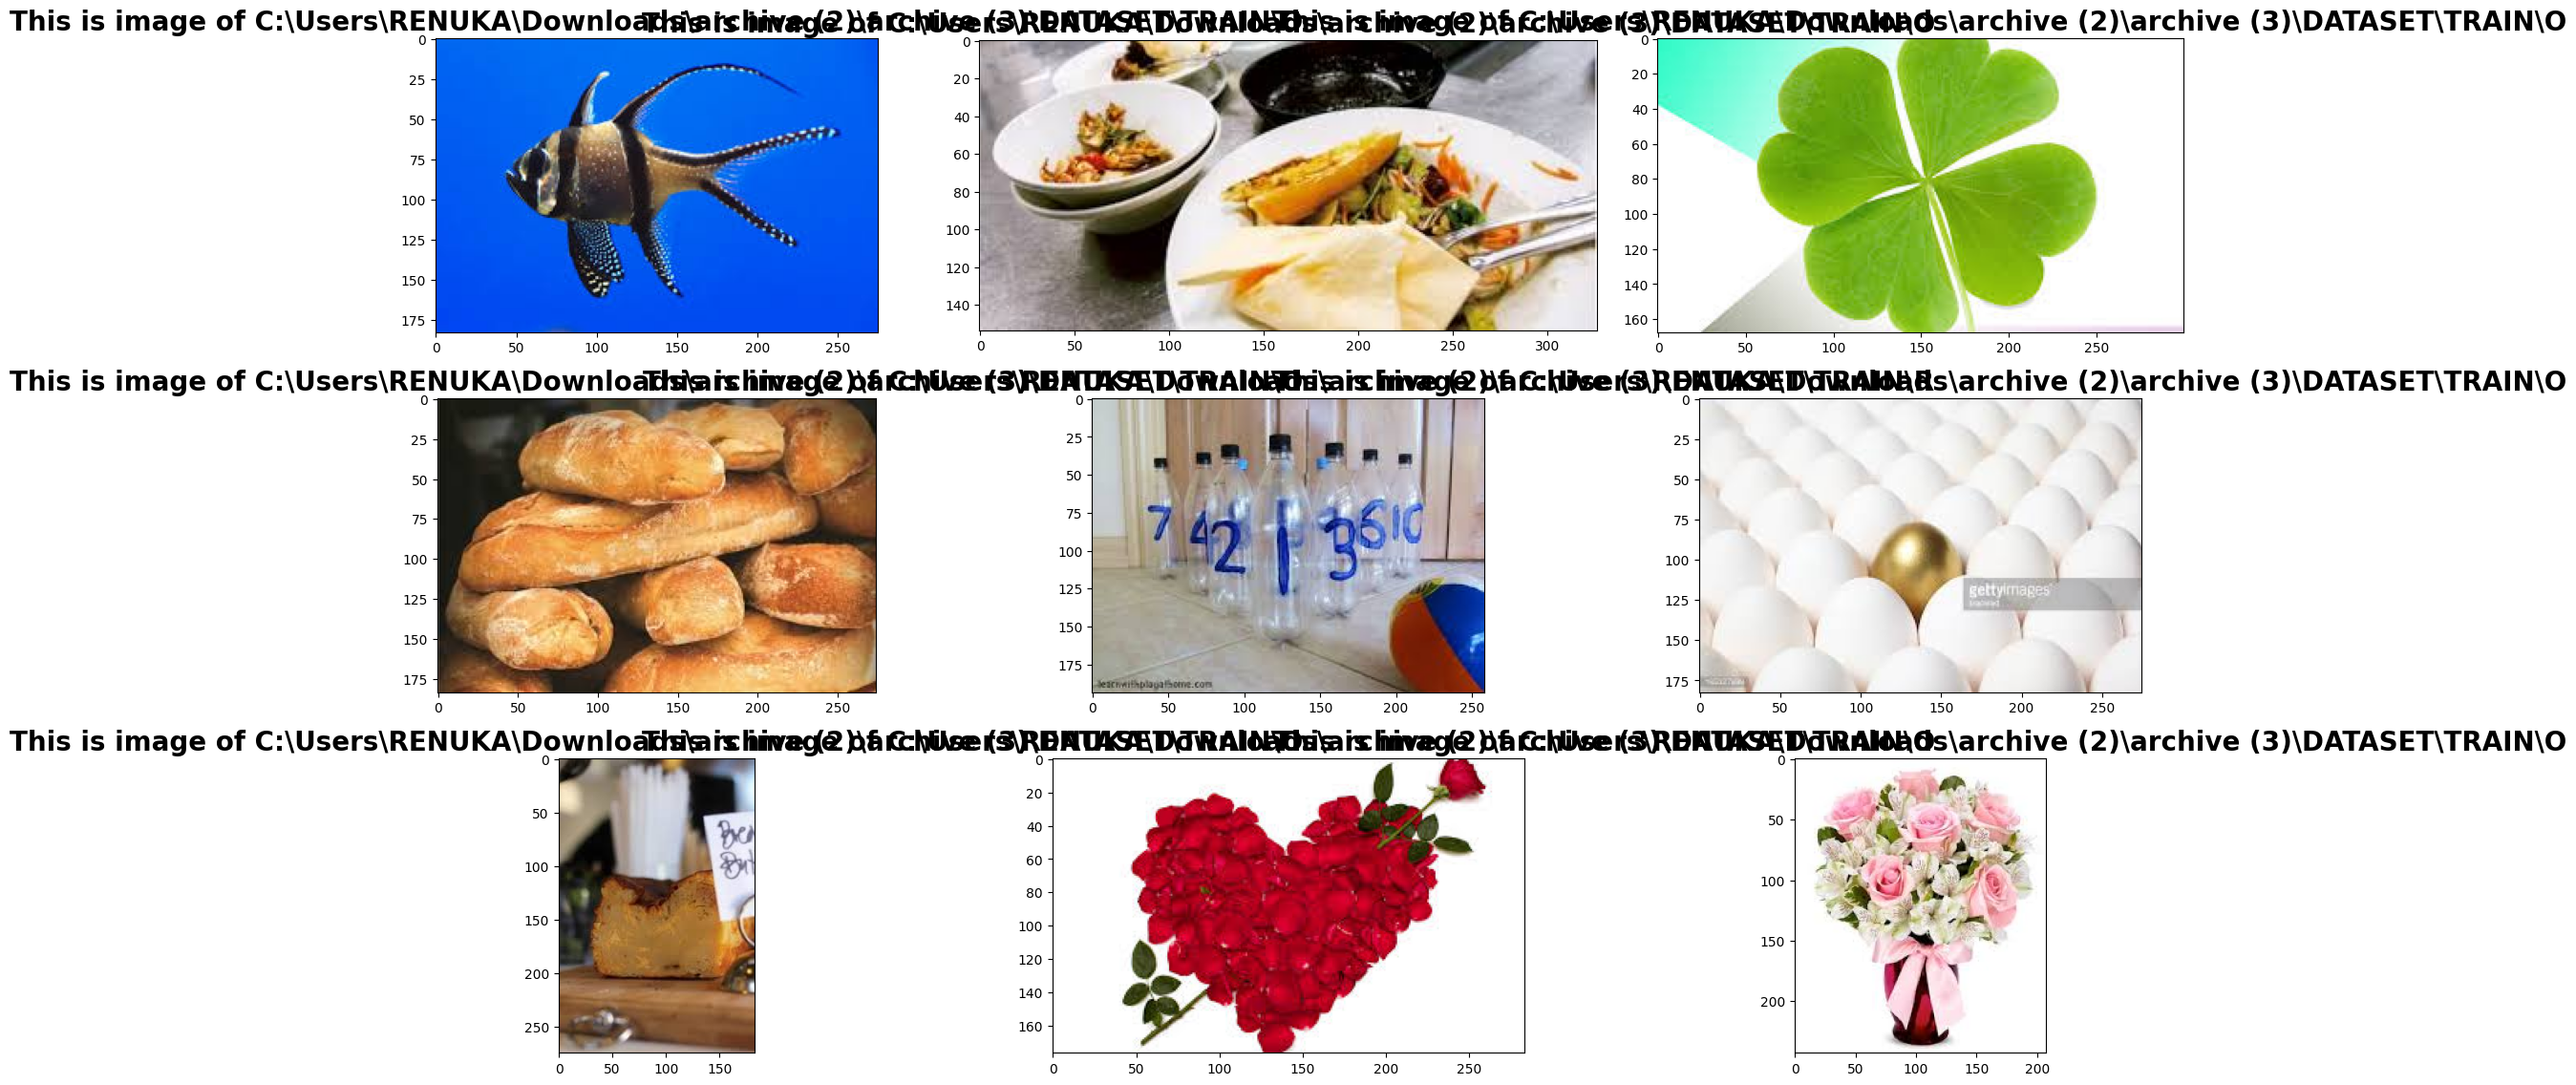

In [7]:
plt.figure(figsize = (20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12) + 1)
    index = np.random.randint(15000)
    plt.title('This is image of {0}'.format(data.label[index]),
             fontdict = {'size':20, 'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [8]:
className = glob(train_path + '/*')
numberOfClasses = len(className)
print(numberOfClasses)

2


In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

In [11]:
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(numberOfClasses))  
model.add(Activation('sigmoid'))

ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[86528,256] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:Mul] name: 

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
batch_size=256

In [ ]:
model.summary()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical'
)

In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical'
)

In [24]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

MemoryError: Unable to allocate 147. MiB for an array with shape (256, 224, 224, 3) and data type float32

In [25]:
plt.figure(figsize = [10, 6])
plt.plot(history.history['accuracy'], label = 'Train acc')
plt.plot(history.history['val_accuracy'], label = 'Validation acc')
plt.legend()
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize = [10, 6])
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [ ]:
def predict_func(img):
    plt.figure(figsize = (6, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))
    if result == 0: print('\033[94m'+'This image -> Recyclable'+'\033[03m')
    elif result == 1: print('\033[94m'+'This image -> Organic'+'\033[03m')

In [ ]:
test_img = cv2.imread("C:\Users\SUCHETI\OneDrive\Desktop\py\DATASET\TEST\O\O_12681.jpg")
predict_func(test_img)

In [ ]:
test_img = cv2.imread("C:\Users\SUCHETI\OneDrive\Desktop\py\DATASET\TEST\R\R_10120.jpg")
predict_func(test_img)